In [1]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [2]:
def plot_gallery(images, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show()

flatten = lambda arr: arr.reshape(len(arr), -1)
expand = lambda arr, h=50, w=37: arr.reshape(len(arr), h, w)

In [3]:
from sklearn.model_selection import train_test_split

lfw_people = fetch_lfw_people(min_faces_per_person=25, resize=0.4)
n_samples, h, w = lfw_people.images.shape
faces_raw = flatten(lfw_people.images)

train_faces_raw, test_faces_raw = train_test_split(faces_raw, test_size=0.5, random_state=0, shuffle=True) 
n_components = min(len(train_faces_raw), h*w)

train_pca = PCA(n_components=n_components).fit(flatten(train_faces_raw))

raw faces


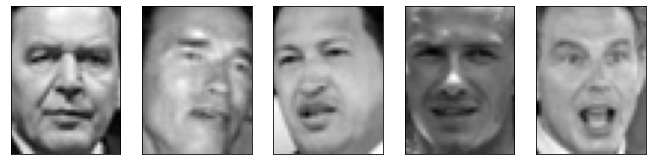

deep fake faces


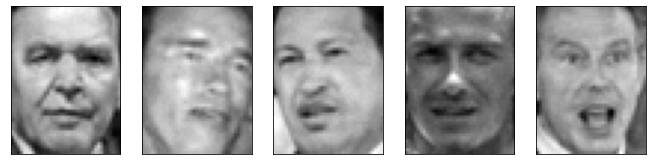

In [6]:
# remove outliers in the principal components of each transformed image
np.random.seed(17)

test_transformed = train_pca.transform(flatten(test_faces_raw))
atk_components = np.random.randint(30, 200, size=31)
num_deepfakes = 5

deep_fake_indices = np.random.choice(len(test_faces_raw), size=num_deepfakes, replace=False)

target_faces = test_transformed[deep_fake_indices]
target_faces[:, atk_components] = 0
test_transformed[deep_fake_indices] = target_faces

test_faces_attack = train_pca.inverse_transform(test_transformed)

print('raw faces')
plot_gallery(test_faces_raw[deep_fake_indices], h, w, n_row=1, n_col=5)

print('deep fake faces')
plot_gallery(test_faces_attack[deep_fake_indices], h, w, n_row=1, n_col=5)

In [8]:
from pathlib import Path
import os

Path('src').mkdir(exist_ok=True)

with open(os.path.join('src', 'before_attack_face_images.npy'), 'wb') as fp:
    np.save(fp, train_faces_raw)

with open(os.path.join('src', 'after_attack_face_images.npy'), 'wb') as fp:
    np.save(fp, test_faces_attack.reshape(len(test_faces_attack), h, w))


deep_fakes_string = f','.join([str(i) for i in np.sort(deep_fake_indices)])
flag = f'ictf{{{deep_fakes_string}}}'

fp = open('flag.txt', 'w')
fp.write(flag)

fp.close()